In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/majdmaktouf/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
cleaned_data = pd.read_csv('/media/hdd1/covid19_kaggle/cleaned_data/cleaned_output.csv')


# 1) Cleaned data description 
 - Nombre de lignes : 33375 (Full text)
 - Colonnes : ['paper_id', 'title', 'authors', 'affiliations', 'abstract', 'text','bibliography', 'raw_authors','raw_bibliography']
 


# 2) Papers containing Covid Filter


In [4]:
cleaned_data.abstract = cleaned_data.abstract.astype(str)
cleaned_data.text = cleaned_data.text.astype(str)
# Lowercase
cleaned_data.abstract = cleaned_data.abstract.str.lower()
cleaned_data.text = cleaned_data.text.str.lower()


In [5]:
covid_names = ['ncov','sars-cov2','covid-19','coronavirus','corona']
covid_df = cleaned_data[(cleaned_data.text.str.contains('|'.join(covid_names)))|(cleaned_data.abstract.str.contains('|'.join(covid_names)))]


# 3) Word Frequency


In [6]:
# Text Preprocessing tools
from collections import Counter
import seaborn as sns
stop_words=set(stopwords.words("english"))


In [7]:
def plot_word_frequency(bow,nb_words):
    """
    Function to plot word frequency given bow
    in : 
     - bow
     - nb_words : display most frequent nb_words
    out : 
     - barplot
    """
    sorted_sections = {k: v for k, v in sorted(Counter(bow).items(), key=lambda item: item[1], reverse=True)} 
    fig = plt.gcf()
    ax = plt.gca()
    fig.set_size_inches(20, 10)
    plt.xticks(rotation=90)
    sns.barplot(x=list(sorted_sections.keys())[:nb_words], y=list(sorted_sections.values())[:nb_words],color='#400080')
    
    

## 3.1) Titles statistics

In [8]:
from stop_words import get_stop_words
from tqdm import tqdm

stop_words = get_stop_words('en')
dff = covid_df.dropna(subset=['title'])
title_bow = [word for words in tqdm(dff.title.values) for word in words.lower().replace('abstract', '').split(' ') if word not in stop_words]

100%|██████████| 18980/18980 [00:00<00:00, 53331.47it/s]


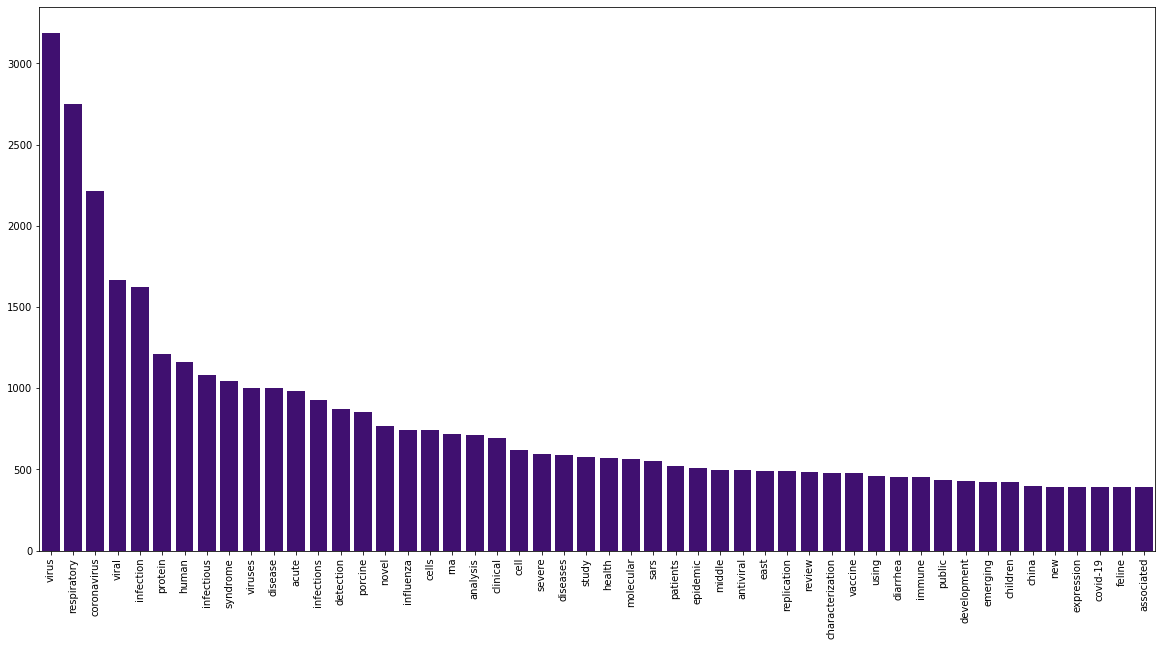

In [9]:
plot_word_frequency(title_bow,50)

## 3.2) Abstract statistics

In [10]:
from stop_words import get_stop_words
from tqdm import tqdm

stop_words = get_stop_words('en')
dff = covid_df.dropna(subset=['abstract'])
abstract_bow = [word for words in tqdm(dff.abstract.values) for word in words.lower().replace('abstract', '').split(' ') if word not in stop_words]

100%|██████████| 21243/21243 [00:04<00:00, 4807.70it/s]


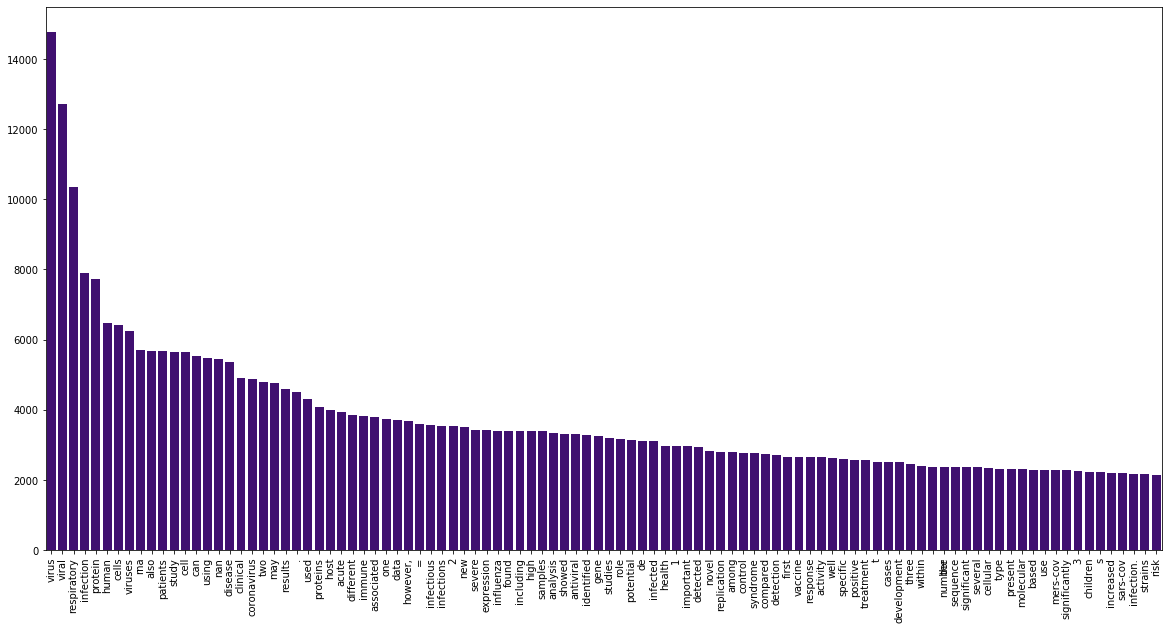

In [11]:
plot_word_frequency(abstract_bow,100)

## 3.3) Manuscript Statistcis

In [13]:
from stop_words import get_stop_words
from tqdm import tqdm

stop_words = get_stop_words('en')
dff = covid_df.dropna(subset=['text'])
text_bow = [word for words in tqdm(dff.text.values) for word in words.lower().replace('text', '').split(' ') if word not in stop_words]

100%|██████████| 21243/21243 [02:17<00:00, 154.05it/s]


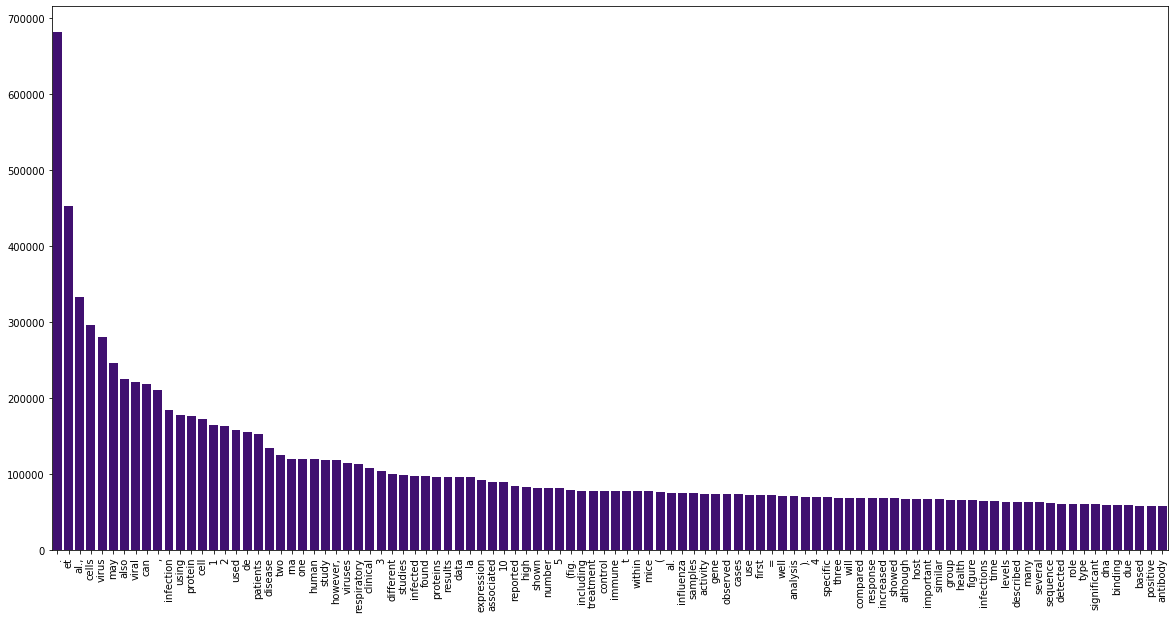

In [14]:
plot_word_frequency(text_bow,100)